In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data_test=pd.read_csv("./Data/test.csv")
data_train=pd.read_csv("./Data/train.csv")
data_sample=pd.read_csv("./Data/sample_submission.csv")
data_store=pd.read_csv("./Data/store.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_15352\2204160662.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("./Data/train.csv")


In [7]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [84]:
print(data_store)

      Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0        

In [6]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
data_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


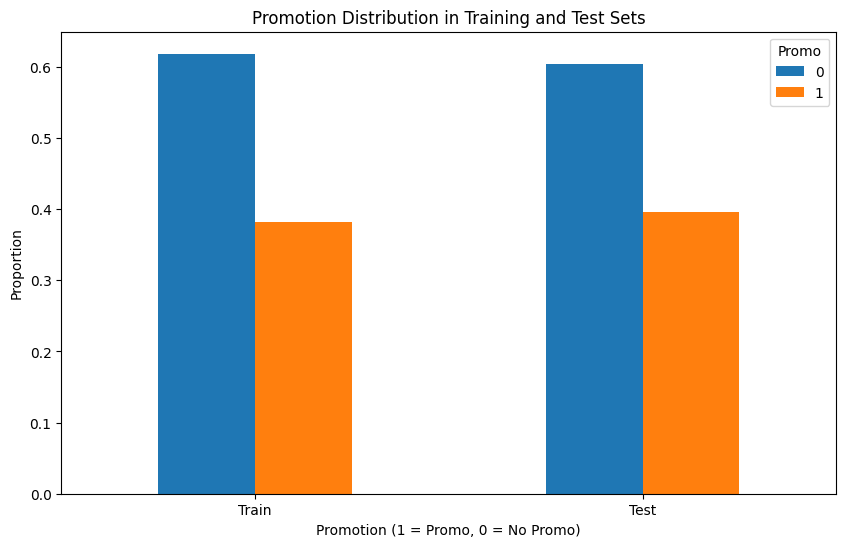

In [15]:


train_promo_dist = data_train['Promo'].value_counts(normalize=True)
test_promo_dist = data_test['Promo'].value_counts(normalize=True)


promo_comparison_df = pd.DataFrame({
    'Train': train_promo_dist,
    'Test': test_promo_dist
}).T  

promo_comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Promotion Distribution in Training and Test Sets')
plt.ylabel('Proportion')
plt.xlabel('Promotion (1 = Promo, 0 = No Promo)')
plt.xticks(rotation=0)
plt.show()


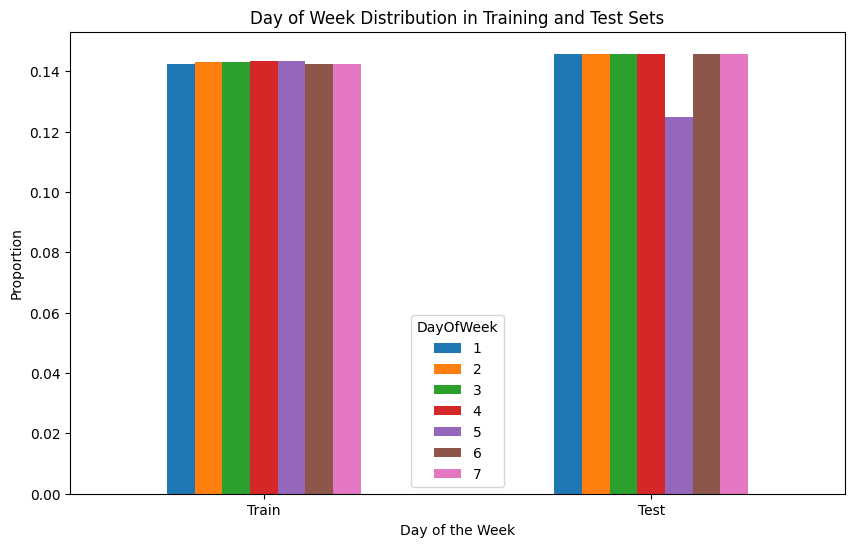

In [16]:
train_day_dist = data_train['DayOfWeek'].value_counts(normalize=True)
test_day_dist = data_test['DayOfWeek'].value_counts(normalize=True)

day_comparison_df = pd.DataFrame({
    'Train': train_day_dist,
    'Test': test_day_dist
}).T

# Visualize
day_comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Day of Week Distribution in Training and Test Sets')
plt.ylabel('Proportion')
plt.xlabel('Day of the Week')
plt.xticks(rotation=0)
plt.show()


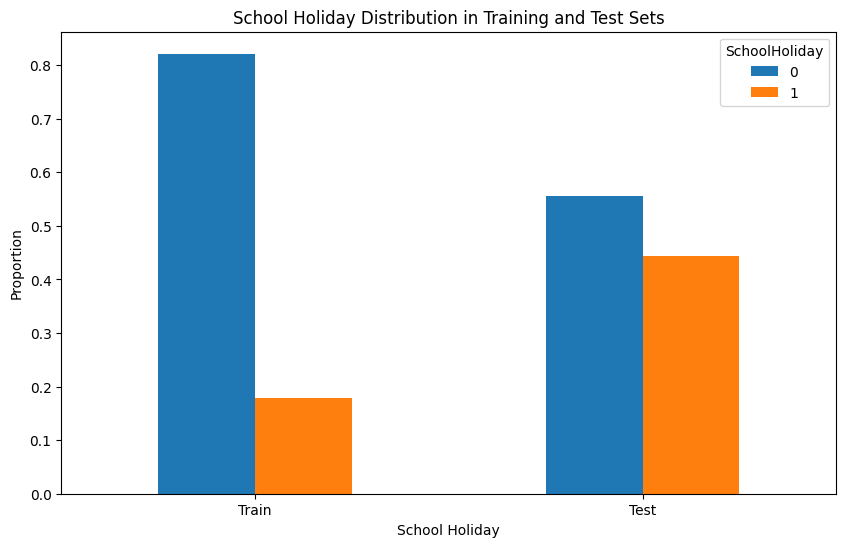

In [20]:

train_school_dist = data_train['SchoolHoliday'].value_counts(normalize=True)
test_school_dist = data_test['SchoolHoliday'].value_counts(normalize=True)

# Combine into a DataFrame for easy comparison
school_comparison_df = pd.DataFrame({
    'Train': train_school_dist,
    'Test': test_school_dist
}).T

# Visualize
school_comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('School Holiday Distribution in Training and Test Sets')
plt.ylabel('Proportion')
plt.xlabel('School Holiday')
plt.xticks(rotation=0)
plt.show()



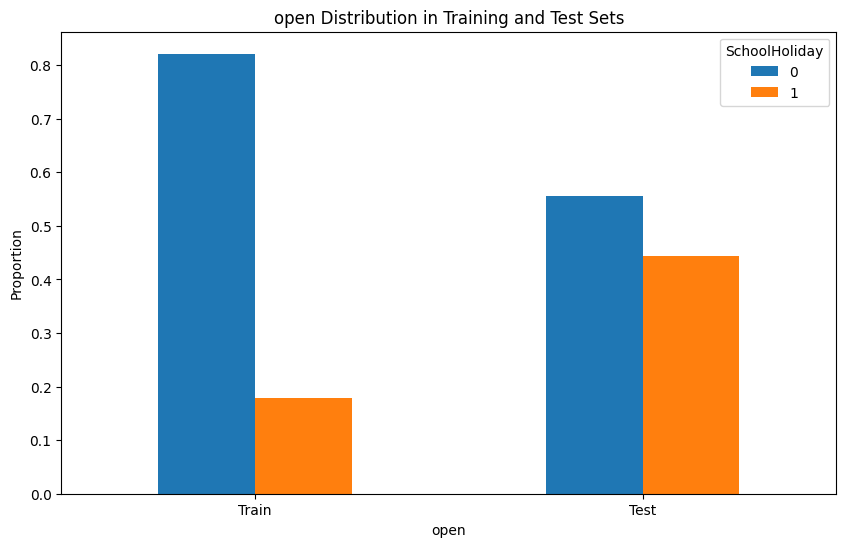

In [22]:

train_open = data_train['Open'].value_counts(normalize=True)
test_open= data_test['Open'].value_counts(normalize=True)

open_comparison_df = pd.DataFrame({
    'Train': train_open,
    'Test': test_open
}).T

# Visualize
school_comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('open Distribution in Training and Test Sets')
plt.ylabel('Proportion')
plt.xlabel('open')
plt.xticks(rotation=0)
plt.show()



In [27]:
data_train["Date"]=pd.to_datetime(data_train["Date"])

In [28]:
data_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


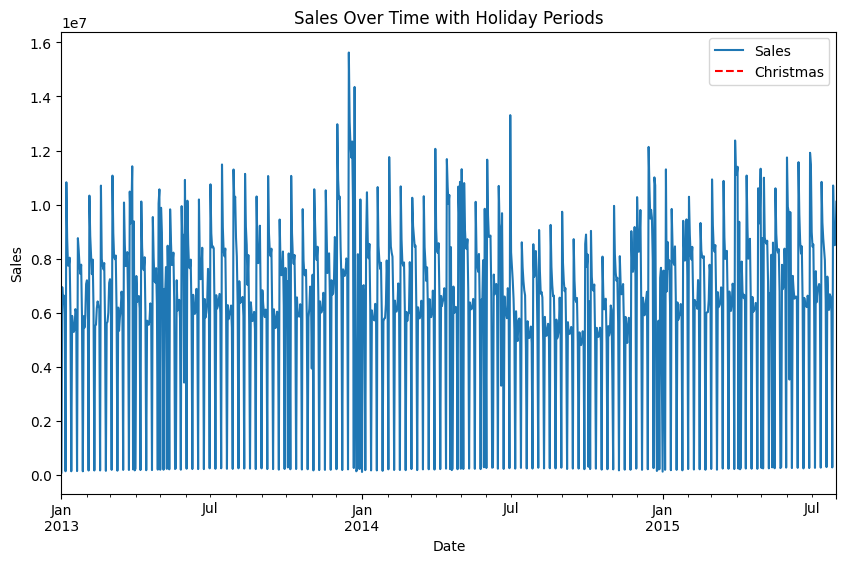

In [30]:
data_train_open = data_train[data_train['Open'] == 1]


holiday = data_train_open[data_train_open['StateHoliday'].isin(['a', 'b', 'c'])]

# Set periods: 7 days before, during, and 7 days after each holiday
for holiday_date in holiday['Date'].unique():
    pre_holiday = data_train_open[(data_train_open['Date'] < holiday_date) & (data_train_open['Date'] >= holiday_date - pd.Timedelta(days=7))]
    during_holiday = data_train_open[data_train_open['Date'] == holiday_date]
    post_holiday = data_train_open[(data_train_open['Date'] > holiday_date) & (data_train_open['Date'] <= holiday_date + pd.Timedelta(days=7))]

    # Calculate metrics for each period
    pre_sales = pre_holiday['Sales'].sum()
    during_sales = during_holiday['Sales'].sum()
    post_sales = post_holiday['Sales'].sum()

    
plt.figure(figsize=(10, 6))
data_train_open.groupby('Date')['Sales'].sum().plot()
plt.axvline(pd.to_datetime('2023-12-25'), color='r', linestyle='--', label='Christmas')
plt.title('Sales Over Time with Holiday Periods')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

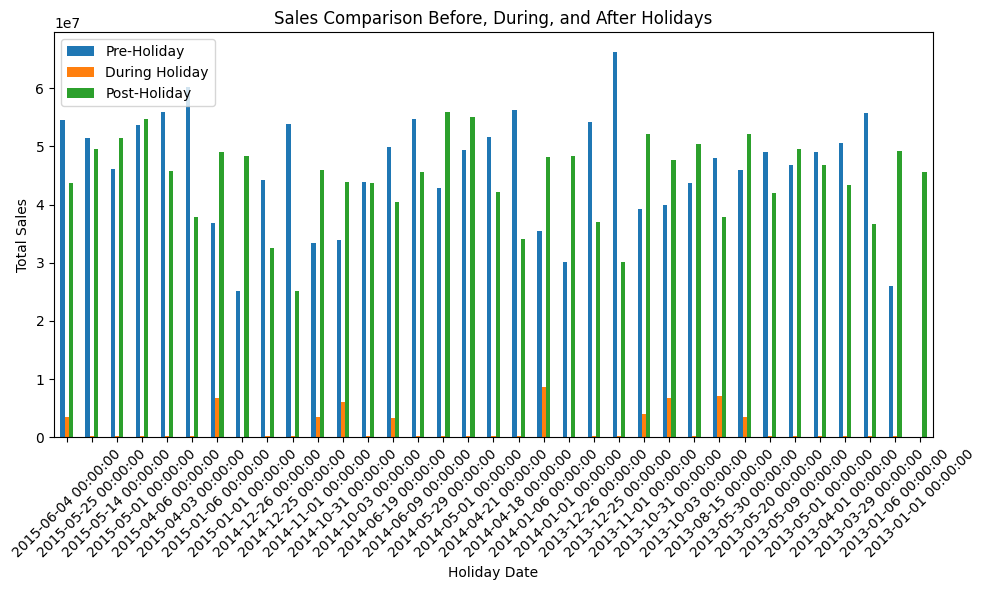

In [31]:


# Filter only open stores
data_train_open = data_train[data_train['Open'] == 1]

# Function to calculate sales before, during, and after the holiday
def holiday_sales(data_train, holiday_dates, days=7):
    results = {'Holiday': [], 'Pre-Holiday': [], 'During Holiday': [], 'Post-Holiday': []}
    
    for holiday_date in holiday_dates:
        # Define pre-holiday, during-holiday, and post-holiday periods
        pre_holiday = data_train[(data_train['Date'] < holiday_date) & (data_train['Date'] >= holiday_date - pd.Timedelta(days=days))]
        during_holiday = data_train[data_train['Date'] == holiday_date]
        post_holiday = data_train[(data_train['Date'] > holiday_date) & (data_train['Date'] <= holiday_date + pd.Timedelta(days=days))]
        
        # Calculate total sales for each period
        pre_sales = pre_holiday['Sales'].sum()
        during_sales = during_holiday['Sales'].sum()
        post_sales = post_holiday['Sales'].sum()
        
        # Store results
        results['Holiday'].append(holiday_date)
        results['Pre-Holiday'].append(pre_sales)
        results['During Holiday'].append(during_sales)
        results['Post-Holiday'].append(post_sales)
    
    return pd.DataFrame(results)

# Extract holiday dates from 'StateHoliday' column where there are holidays (a, b, c)
holiday_dates = data_train_open[data_train_open['StateHoliday'].isin(['a', 'b', 'c'])]['Date'].unique()

# Calculate sales for 7 days before, during, and 7 days after each holiday
sales_data = holiday_sales(data_train_open, holiday_dates, days=7)

# Plotting the results in a bar chart
sales_data.set_index('Holiday', inplace=True)

# Bar Chart
sales_data.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Comparison Before, During, and After Holidays')
plt.ylabel('Total Sales')
plt.xlabel('Holiday Date')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


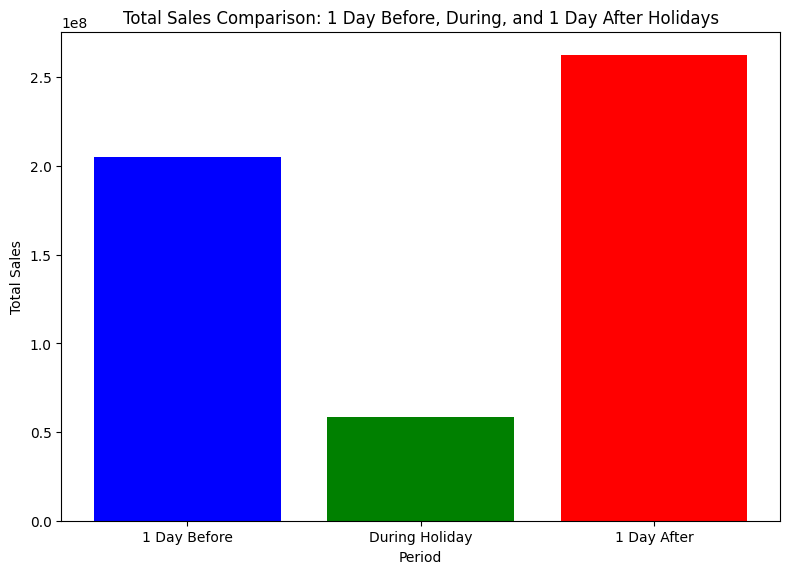

In [35]:

data_train_open = data_train[data_train['Open'] == 1]


def aggregate_holiday_sales(data_train, holiday_dates):
    total_before = 0
    total_during = 0
    total_after = 0
    
    for holiday_date in holiday_dates:
     
        one_day_before = data_train[data_train['Date'] == holiday_date - pd.Timedelta(days=1)]['Sales'].sum()
       
        during_holiday = data_train[data_train['Date'] == holiday_date]['Sales'].sum()
       
        one_day_after = data_train[data_train['Date'] == holiday_date + pd.Timedelta(days=1)]['Sales'].sum()
        
        total_before += one_day_before
        total_during += during_holiday
        total_after += one_day_after
    
    return total_before, total_during, total_after


holiday_dates = data_train_open[data_train_open['StateHoliday'].isin(['a', 'b', 'c'])]['Date'].unique()

total_before, total_during, total_after = aggregate_holiday_sales(data_train_open, holiday_dates)

periods = ['1 Day Before', 'During Holiday', '1 Day After']
total_sales = [total_before, total_during, total_after]


plt.figure(figsize=(8, 6))
plt.bar(periods, total_sales, color=['blue', 'green', 'red'])
plt.title('Total Sales Comparison: 1 Day Before, During, and 1 Day After Holidays')
plt.ylabel('Total Sales')
plt.xlabel('Period')
plt.tight_layout()
plt.show()

In [38]:

Easter_holiday=data_train["Date"][data_train["StateHoliday"] == "b"].unique()
Christmas=data_train["Date"][data_train["StateHoliday"] == "c"].unique()
christmas_dates = pd.to_datetime(Christmas)
easter_dates = pd.to_datetime(Easter_holiday)  # Adjust as needed for different years
public_holiday_dates = data_train_open[data_train_open['StateHoliday'] == 'a']['Date'].unique()

# Combine all holiday dates
holiday_dates = pd.concat([pd.Series(christmas_dates), pd.Series(easter_dates), pd.Series(public_holiday_dates)]).unique()
def analyze_seasonal_behavior(data_train, holiday_dates):
    results = {
        'Holiday': [],
        'Total Sales': [],
        'Average Sales': [],
        'Total Customers': [],
    }

    for holiday_date in holiday_dates:
        # Define the period around the holiday
        start_date = holiday_date - pd.Timedelta(days=7)  # 1 week before
        end_date = holiday_date + pd.Timedelta(days=7)    # 1 week after
        
        # Filter sales data around the holiday
        holiday_data = data_train[(data_train['Date'] >= start_date) & (data_train['Date'] <= end_date)]
        
        # Calculate metrics
        total_sales = holiday_data['Sales'].sum()
        average_sales = holiday_data['Sales'].mean()
        total_customers = holiday_data['Customers'].sum()
        
        # Store results
        results['Holiday'].append(holiday_date)
        results['Total Sales'].append(total_sales)
        results['Average Sales'].append(average_sales)
        results['Total Customers'].append(total_customers)

    return pd.DataFrame(results)

# Analyze purchase behaviors around holidays
seasonal_data = analyze_seasonal_behavior(data_train_open, holiday_dates)

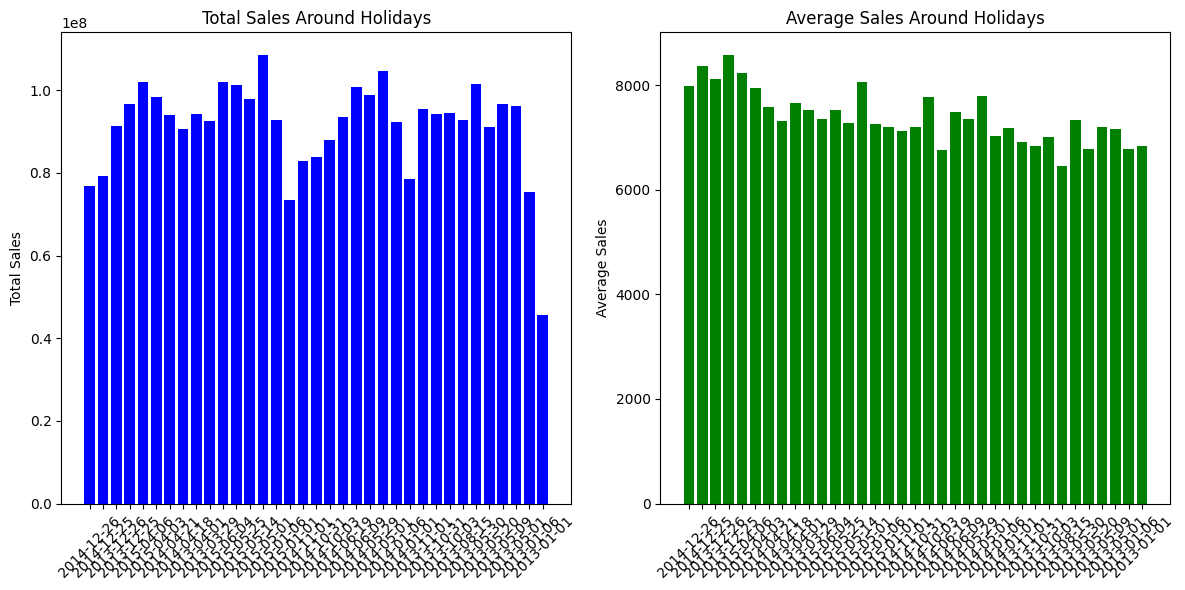

In [39]:
plt.figure(figsize=(12, 6))

# Total Sales
plt.subplot(1, 2, 1)
plt.bar(seasonal_data['Holiday'].astype(str), seasonal_data['Total Sales'], color='blue')
plt.title('Total Sales Around Holidays')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Average Sales
plt.subplot(1, 2, 2)
plt.bar(seasonal_data['Holiday'].astype(str), seasonal_data['Average Sales'], color='green')
plt.title('Average Sales Around Holidays')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Correlation between Sales and Customers: 0.82


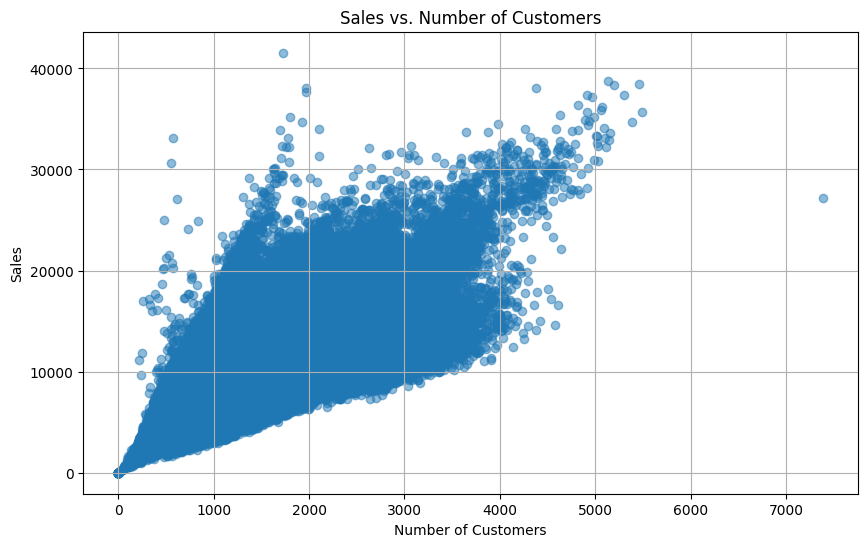

In [43]:
correlation = data_train_open['Sales'].corr(data_train_open['Customers'])
print(f'Correlation between Sales and Customers: {correlation:.2f}')
plt.figure(figsize=(10, 6))
plt.scatter(data_train_open['Customers'], data_train_open['Sales'], alpha=0.5)
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14992\2089329788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_open['Customer_Bin'] = pd.cut(data_train_open['Customers'], bins=5)
C:\Users\user\AppData\Local\Temp\ipykernel_14992\2089329788.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_train_open[data_train_open['Customer_Bin'] == bin]['Sales'] for bin in data_train_open['Customer_Bin'].cat.categories],


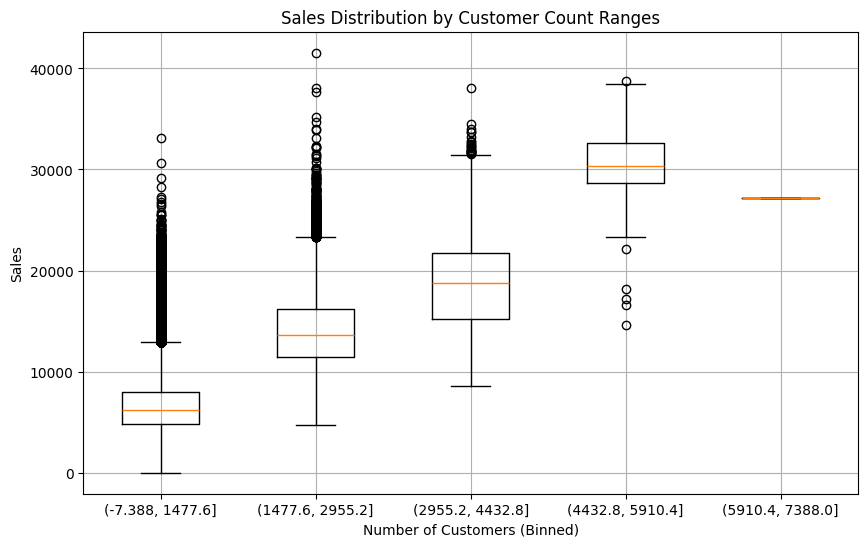

In [42]:
data_train_open['Customer_Bin'] = pd.cut(data_train_open['Customers'], bins=5)

plt.figure(figsize=(10, 6))
plt.boxplot([data_train_open[data_train_open['Customer_Bin'] == bin]['Sales'] for bin in data_train_open['Customer_Bin'].cat.categories],
            labels=[str(bin) for bin in data_train_open['Customer_Bin'].cat.categories])
plt.title('Sales Distribution by Customer Count Ranges')
plt.xlabel('Number of Customers (Binned)')
plt.ylabel('Sales')
plt.grid()
plt.show()

In [44]:

existing_customers = data_train_open[data_train_open['Customers'] > 0]

# Analyze average sales for existing customers during promotions
existing_promo_sales = existing_customers[existing_customers['Promo'] == 1]['Sales'].mean()
existing_non_promo_sales = existing_customers[existing_customers['Promo'] == 0]['Sales'].mean()

print(f"\nAverage Sales from Existing Customers During Promotions: {existing_promo_sales:.2f}")
print(f"Average Sales from Existing Customers Without Promotions: {existing_non_promo_sales:.2f}")



Average Sales from Existing Customers During Promotions: 8228.70
Average Sales from Existing Customers Without Promotions: 5929.83


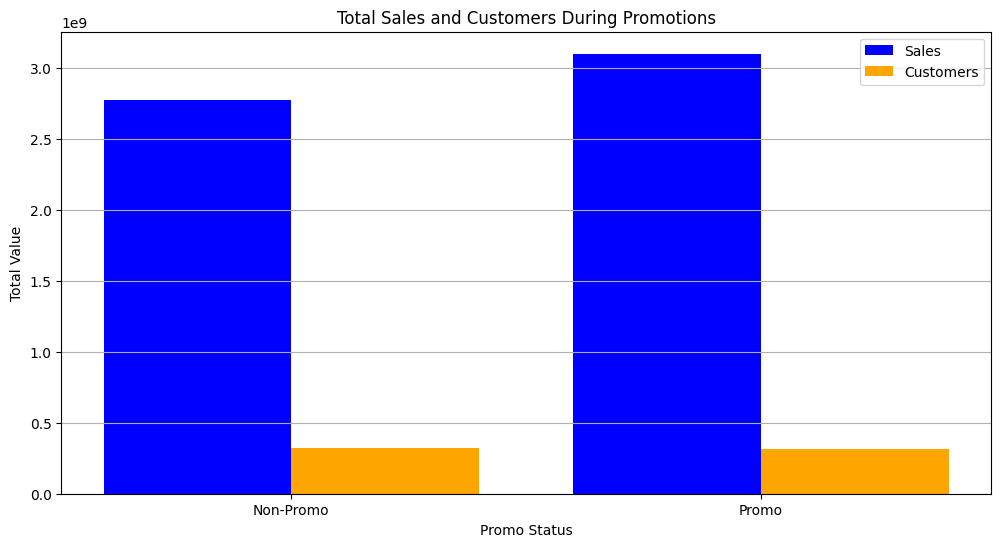

In [45]:


# Group by Promo status
promo_sales = data_train_open.groupby('Promo')['Sales'].sum()
promo_customers = data_train_open.groupby('Promo')['Customers'].sum()

# Create a bar chart
labels = ['Non-Promo', 'Promo']
sales_values = promo_sales.values
customers_values = promo_customers.values

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, sales_values, width=0.4, label='Sales', color='blue', align='center')
plt.bar([p + 0.4 for p in x], customers_values, width=0.4, label='Customers', color='orange', align='center')

plt.xlabel('Promo Status')
plt.ylabel('Total Value')
plt.title('Total Sales and Customers During Promotions')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.grid(axis='y')
plt.show()


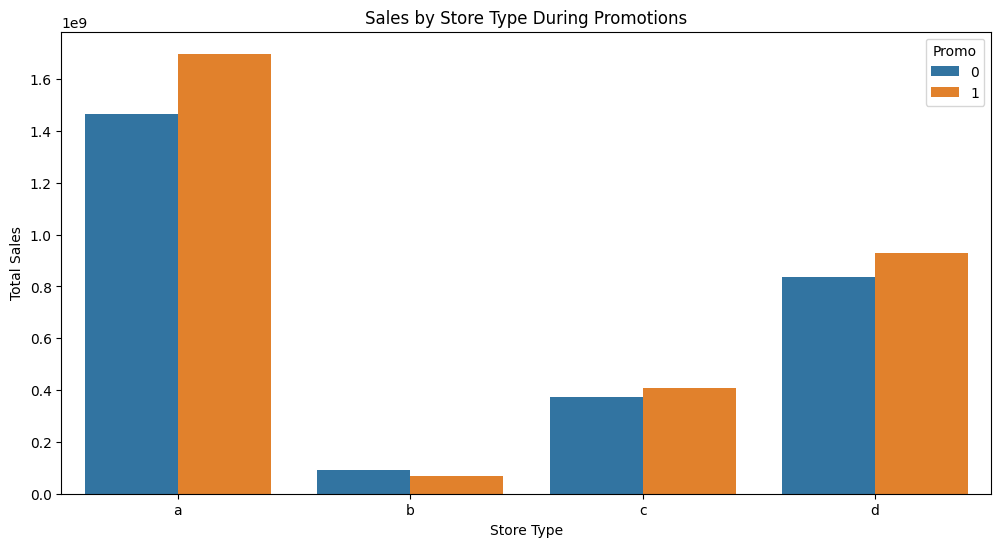

In [13]:
merged_data = pd.merge(data_train, data_store, on='Store')
promo_sales = merged_data.groupby(['Promo', 'StoreType']).agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=promo_sales)
plt.title('Sales by Store Type During Promotions')
plt.ylabel('Total Sales')
plt.xlabel('Store Type')
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


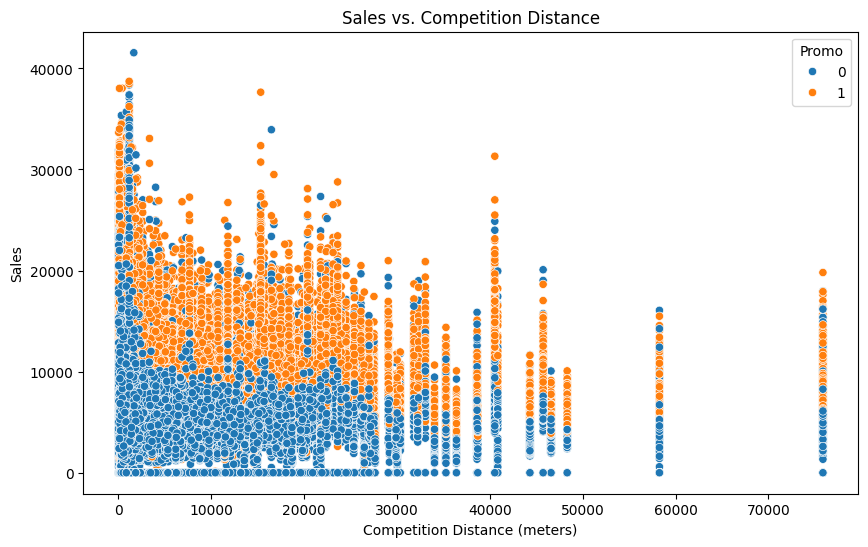

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', hue='Promo', data=merged_data)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.show()

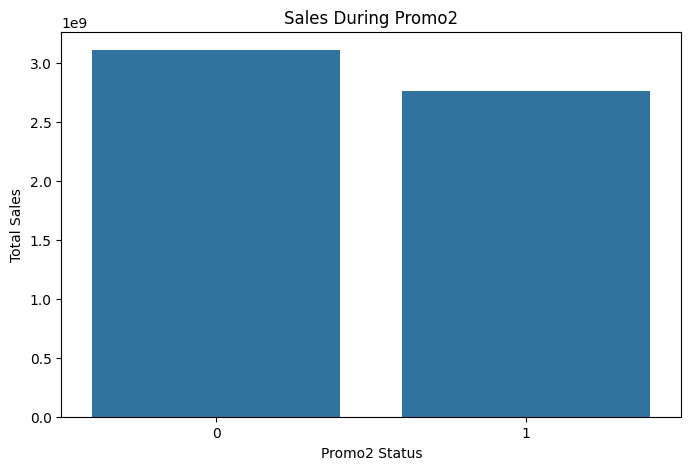

In [54]:
promo2_sales = merged_data.groupby(['Promo2']).agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Promo2', y='Sales', data=promo2_sales)
plt.title('Sales During Promo2')
plt.ylabel('Total Sales')
plt.xlabel('Promo2 Status')
plt.show()

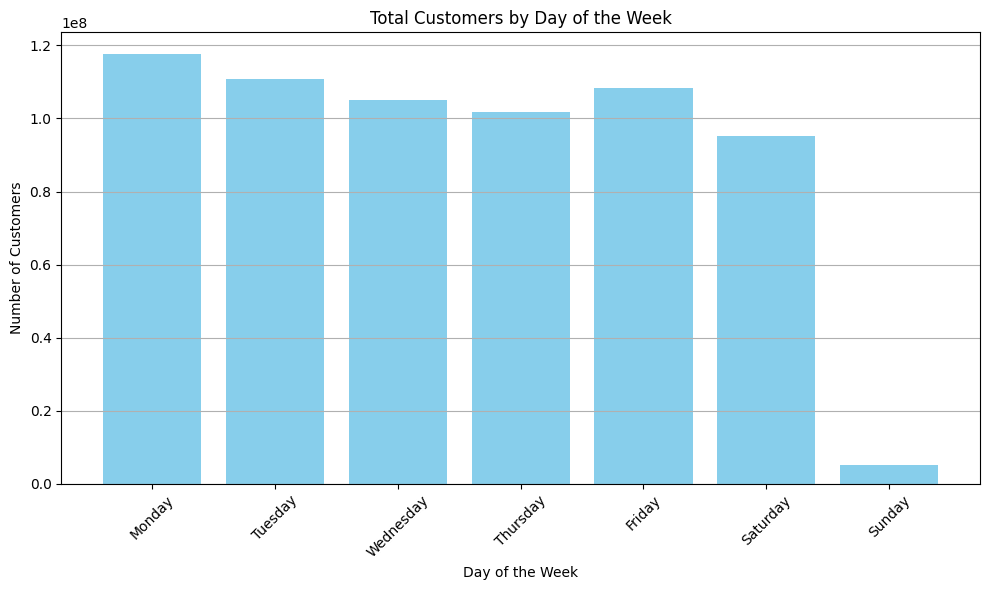

In [8]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_train['DayOfWeek'] = data_train['Date'].dt.day_name()
weekly_customers = data_train.groupby('DayOfWeek')['Customers'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
# Create a plot
plt.figure(figsize=(10, 6))

# Bar plot for total customers by day of the week
plt.bar(weekly_customers['DayOfWeek'], weekly_customers['Customers'], color='skyblue')

# Adding titles and labels
plt.title('Total Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_6084\88156037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time'] = range(len(filtered_data))


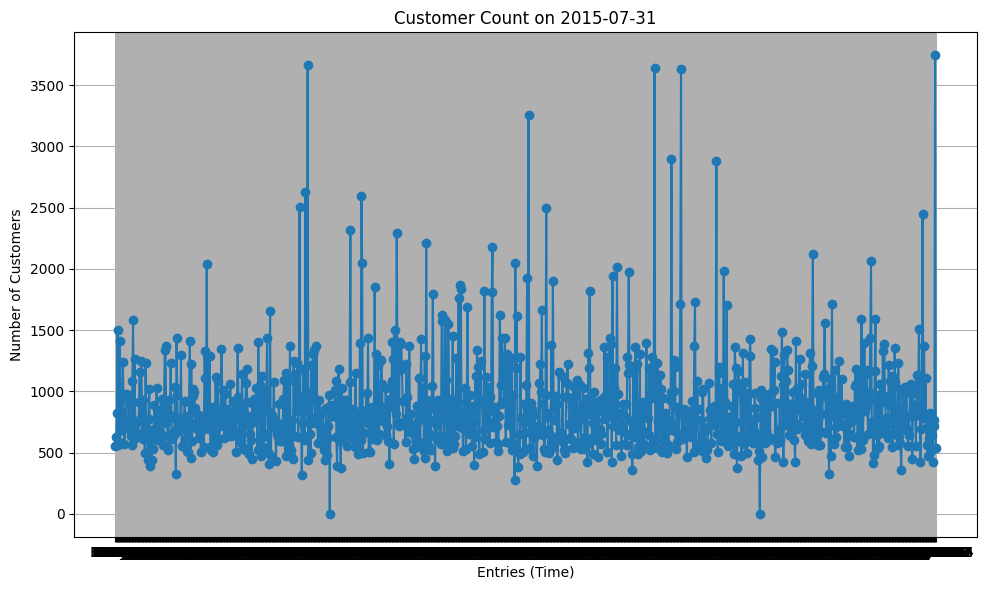

In [11]:

data_train['Date'] = pd.to_datetime(data_train['Date'])

# Filter for the specific date
specific_date = '2015-07-31'
filtered_data = data_train[data_train['Date'] == specific_date]

# Simulate time data (if needed, for example purposes)
# Here, we're creating a simple index as a time representation
filtered_data['Time'] = range(len(filtered_data))

# Create a plot for the specific date
plt.figure(figsize=(10, 6))

# Plotting the number of customers for the specific date
plt.plot(filtered_data['Time'], filtered_data['Customers'], marker='o', linestyle='-')

# Adding titles and labels
plt.title(f'Customer Count on {specific_date}')
plt.xlabel('Entries (Time)')
plt.ylabel('Number of Customers')
plt.xticks(ticks=filtered_data['Time'], labels=[f'Entry {i+1}' for i in range(len(filtered_data))])
plt.grid()
plt.tight_layout()
plt.show()



In [35]:
weekdays = merged_data[merged_data['DayOfWeek'].isin(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday'])]
open_stores = weekdays.groupby('Store')['Open'].sum().reset_index()

# Filter stores that are open for all weekdays (5 days)
open_all_weekdays = open_stores[open_stores['Open'] == 5]['Store']
# Filter for weekend data (Saturday = 6, Sunday = 7)
weekend_data = merged_data[merged_data['DayOfWeek'].isin(["Saturday","Sunday"])]

# Check sales for stores open on all weekdays
weekend_sales_open_stores = weekend_data[weekend_data['Store'].isin(open_all_weekdays)]

# Check sales for stores not open on all weekdays
weekend_sales_other_stores = weekend_data[~weekend_data['Store'].isin(open_all_weekdays)]

# Summarize the sales
sales_summary = {
    'Stores Open All Weekdays': weekend_sales_open_stores.groupby('Store')['Sales'].sum(),
    'Stores Not Open All Weekdays': weekend_sales_other_stores.groupby('Store')['Sales'].sum(),
}

sales_summary


{'Stores Open All Weekdays': Series([], Name: Sales, dtype: int64),
 'Stores Not Open All Weekdays': Store
 1        662358
 2        384996
 3        594242
 4       1355202
 5        278600
          ...   
 1111     440689
 1112    1151380
 1113     789739
 1114    2939357
 1115     907634
 Name: Sales, Length: 1115, dtype: int64}

In [39]:
data_open = merged_data[merged_data['Open'] == 1]
data_open.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,Friday,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,Friday,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,Friday,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,Friday,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


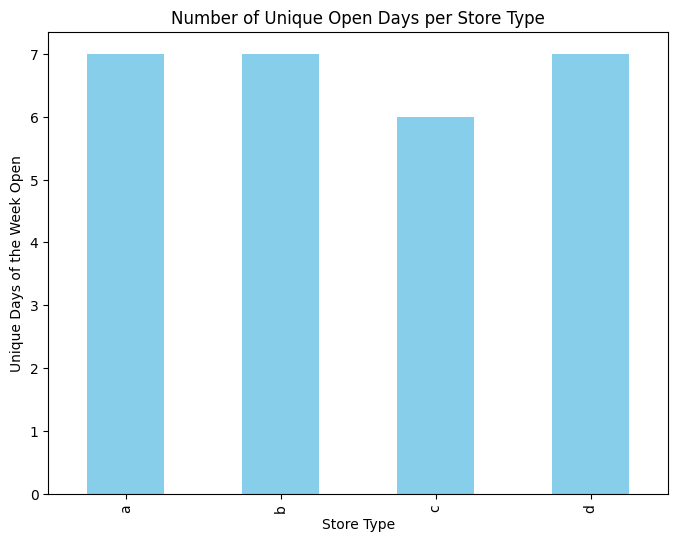

In [52]:
data_open_days = data_open.groupby("StoreType")['DayOfWeek'].apply(lambda x: x.nunique())
plt.figure(figsize=(8, 6))
data_open_days.plot(kind='bar', color='skyblue')

plt.title('Number of Unique Open Days per Store Type')
plt.xlabel('Store Type')
plt.ylabel('Unique Days of the Week Open')
plt.show()

In [50]:
unique_combinations = data_open[['StoreType', 'DayOfWeek']].drop_duplicates()
unique_combinations

,StoreType,DayOfWeek
0,c,Friday
1,a,Friday
12,d,Friday
84,b,Friday
1115,c,Thursday
1116,a,Thursday
1127,d,Thursday
1199,b,Thursday
2230,c,Wednesday
2231,a,Wednesday


In [53]:
weekend_data = data_open[data_open['DayOfWeek'].isin(["Saturday", "Sunday"])]
weekend_sales = weekend_data.groupby('StoreType')['Sales'].sum().reset_index()
weekend_sales

,StoreType,Sales
0,a,421984278
1,b,43117908
2,c,127986018
3,d,282780964


C:\Users\user\AppData\Local\Temp\ipykernel_6084\4158378020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StoreType', y='Sales', data=weekend_sales, palette='viridis')


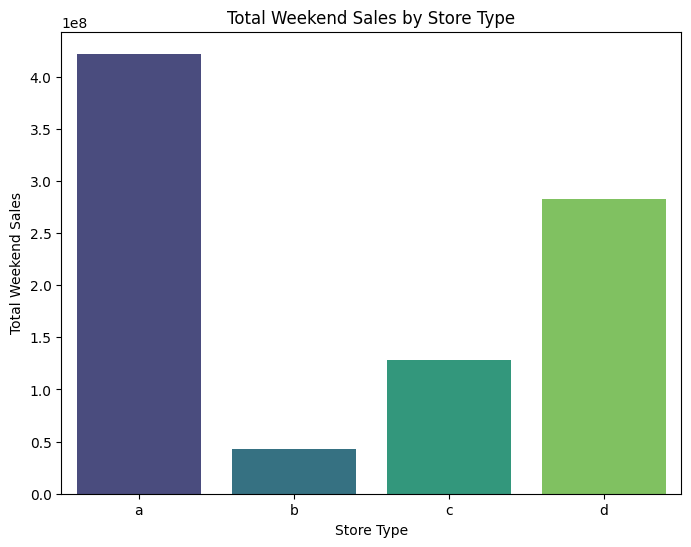

In [54]:
plt.figure(figsize=(8, 6))
sns.barplot(x='StoreType', y='Sales', data=weekend_sales, palette='viridis')


plt.title('Total Weekend Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Weekend Sales')

# Show the plot
plt.show()

In [55]:
assortment_sales = merged_data.groupby('Assortment')['Sales'].sum().reset_index()
assortment_sales

,Assortment,Sales
0,a,2945750070
1,b,70946312
2,c,2856484241


C:\Users\user\AppData\Local\Temp\ipykernel_6084\3132975878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='Blues')


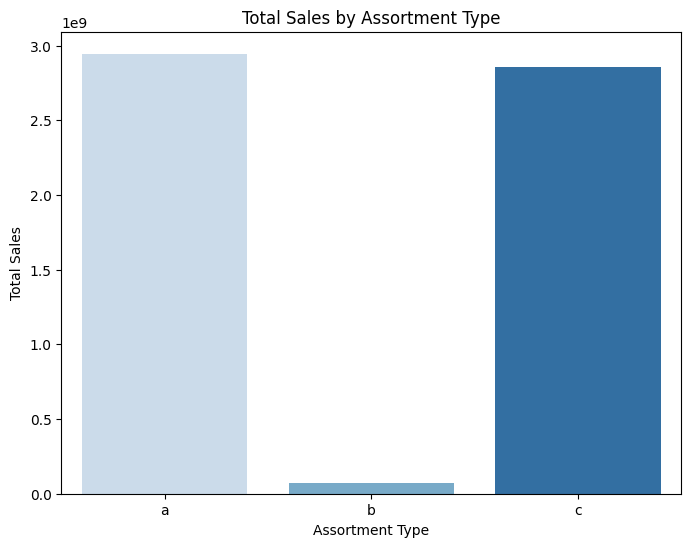

In [56]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='Blues')

# Add a title and labels
plt.title('Total Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Total Sales')

# Show the plot
plt.show()

In [57]:

store_assortment_sales = data_open.groupby(['StoreType', 'Assortment'])['Sales'].sum().reset_index()

store_assortment_sales


,StoreType,Assortment,Sales
0,a,a,1870105131
1,a,c,1295229728
2,b,a,71357761
3,b,b,70946312
4,b,c,16927322
5,c,a,400260421
6,c,c,382961005
7,d,a,604026757
8,d,c,1161366186


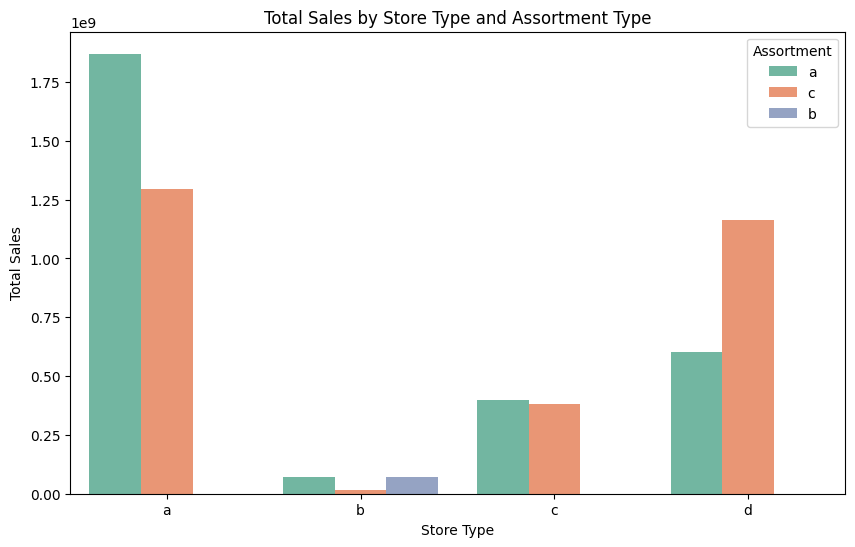

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=store_assortment_sales, palette='Set2')

plt.title('Total Sales by Store Type and Assortment Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')


plt.show()

In [59]:
CompetitionDistance_sales = merged_data.groupby('CompetitionDistance')['Sales'].sum().reset_index()
CompetitionDistance_sales

,CompetitionDistance,Sales
0,20.0,4579807
1,30.0,17552666
2,40.0,29261626
3,50.0,60835848
4,60.0,22088359
...,...,...
649,45740.0,6261174
650,46590.0,3554993
651,48330.0,3798660
652,58260.0,5718883


C:\Users\user\AppData\Local\Temp\ipykernel_6084\4091041713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompetitionDistance', y='Sales', data=CompetitionDistance_sales, palette='viridis')


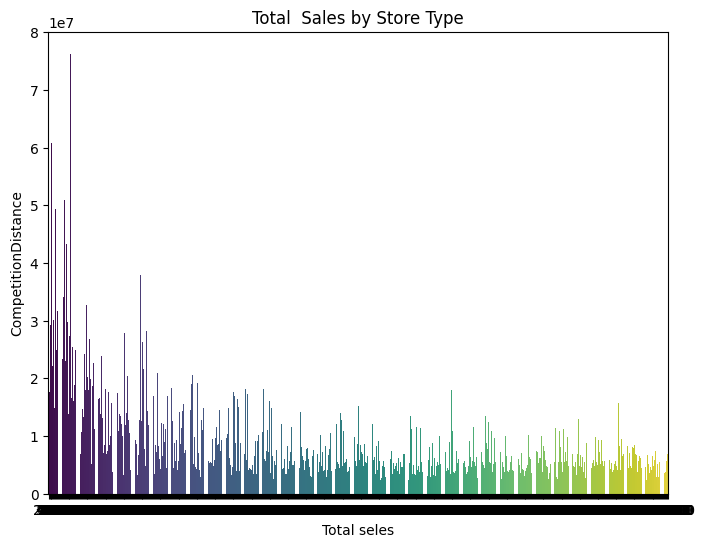

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='CompetitionDistance', y='Sales', data=CompetitionDistance_sales, palette='viridis')


plt.title('Total  Sales by Store Type')
plt.xlabel('Total seles')
plt.ylabel('CompetitionDistance')

# Show the plot
plt.show()

In [72]:
merged_data= pd.merge(data_train, data_store, on='Store').reset_index()
merged_data

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2,Friday,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,Friday,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,Friday,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,4,5,Friday,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,Tuesday,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1017205,1112,Tuesday,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1017206,1113,Tuesday,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1017207,1114,Tuesday,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [75]:
stores_with_na = merged_data[merged_data['CompetitionDistance'].isna()]
stores_reopening = merged_data[merged_data['index'].isin(stores_with_na['index'])]
competitor_distance_changes = stores_reopening[stores_reopening['CompetitionDistance'].notna()]
merged_data = merged_data.merge(competitor_distance_changes[['index', 'Date', 'CompetitionDistance']], on='index', how='left', suffixes=('', '_new'))

# indexentify periods before and after the competitor distance became available
# Here, create a new column indicating whether the competitor distance is now available
merged_data['CompetitorOpened'] = merged_data['CompetitionDistance'].notna()

# Calculate average sales before and after the competitor distance is known
average_sales = merged_data.groupby('CompetitorOpened')['Sales'].mean().reset_index()
print(average_sales)

   CompetitorOpened        Sales
0             False  4535.892884
1              True  5777.042614


C:\Users\user\AppData\Local\Temp\ipykernel_6084\714830139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompetitorOpened', y='Sales', data=average_sales, palette='Set2')


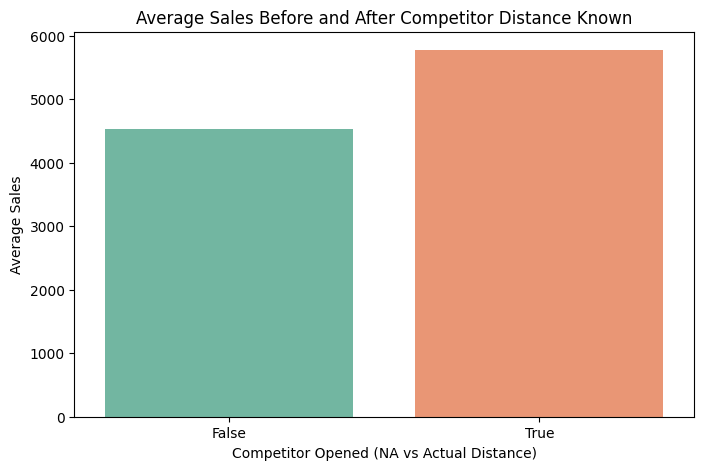

In [81]:
plt.figure(figsize=(8, 5))
sns.barplot(x='CompetitorOpened', y='Sales', data=average_sales, palette='Set2')

# Add title and labels
plt.title('Average Sales Before and After Competitor Distance Known')
plt.xlabel('Competitor Opened (NA vs Actual Distance)')
plt.ylabel('Average Sales')

# Show the plot
plt.show()

In [86]:
import logging
logging.basicConfig(
    level=logging.DEBUG,  # Set the logging level (DEBUG, INFO, WARNING, ERROR, CRITICAL)
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename='app.log',  # Optional: Specify a file to log to
    filemode='w'  # Optional: 'w' to overwrite the log file, 'a' to append
)

logging.debug('This is a debug message.')
logging.info('This is an info message.')
logging.warning('This is a warning message.')
logging.error('This is an error message.')
logging.critical('This is a critical message.')

In [80]:
def some_function(param):
    logging.info(f'Starting some_function with param: {param}')
    try:
        # Perform some operations
        result = param * 2
        logging.debug(f'Result: {result}')
        return result
    except Exception as e:
        logging.error(f'Error occurred: {e}')
some_function(4)

8

In [87]:
data_train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [88]:
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [89]:
data_sample.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [90]:
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
